In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
# Load the datasets
steam_200k = pd.read_csv('/Users/keerfeng/Downloads/Sprint0-Keer Feng 2/steam-200k.csv')
sales = pd.read_csv('/Users/keerfeng/Downloads/Sprint0-Keer Feng 2/Video_Games_Sales_as_at_22_Dec_2016.csv')
steamspy = pd.read_excel('/Users/keerfeng/Downloads/Sprint0-Keer Feng 2/SteamSpy - All the data and stats about Steam games.xlsx')


In [304]:
# Print basic info about each dataset
print("Steam-200k shape:", steam_200k.shape)
print("Sales shape:", sales.shape)
print("SteamSpy shape:", steamspy.shape)

print("\nSteam-200k columns:", steam_200k.columns.tolist())
print("Sales columns:", sales.columns.tolist())
print("SteamSpy columns:", steamspy.columns.tolist())

Steam-200k shape: (200000, 5)
Sales shape: (16719, 16)
SteamSpy shape: (209963, 10)

Steam-200k columns: ['user id', 'Name', 'purchase', 'hours', '0']
Sales columns: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
SteamSpy columns: ['#', 'Game', 'Release date', 'Price', 'Score rank(Userscore / Metascore)', 'Owners', 'Playtime (Median)', 'Developer(s)', 'Publisher(s)', 'Genre']


In [305]:
# Show a preview of each dataset
print("\n--- First few rows of Steam-200k ---")
print(steam_200k.head())

print("\n--- First few rows of Sales ---")
print(sales.head())

print("\n--- First few rows of SteamSpy ---")
print(steamspy.head())


--- First few rows of Steam-200k ---
     user id                        Name  purchase  hours  0
0  151603712  The Elder Scrolls V Skyrim  purchase    1.0  0
1  151603712  The Elder Scrolls V Skyrim      play  273.0  0
2  151603712                   Fallout 4  purchase    1.0  0
3  151603712                   Fallout 4      play   87.0  0
4  151603712                       Spore  purchase    1.0  0

--- First few rows of Sales ---
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \


2. Data Cleaning & Quality Assessment
Check for Missing Values and Duplicates

In [307]:
# 2.1 Missing Values
print("\nMissing values in Steam-200k:")
print(steam_200k.isnull().sum())

print("\nMissing values in Sales:")
print(sales.isnull().sum())

print("\nMissing values in SteamSpy:")
print(steamspy.isnull().sum())


Missing values in Steam-200k:
user id     0
Name        0
purchase    0
hours       0
0           0
dtype: int64

Missing values in Sales:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Missing values in SteamSpy:
#                                       0
Game                                    6
Release date                           11
Price                                9893
Score rank(Userscore / Metascore)       0
Owners                                  0
Playtime (Median)                       0
Developer(s)                          144
Publisher(s)                          575
Genre                                   0
dtype: int64


In [308]:
# Remove duplicate rows from all datasets
steam_200k.drop_duplicates(inplace=True)
sales.drop_duplicates(inplace=True)
steamspy.drop_duplicates(inplace=True)

In [309]:

def print_missing_percentage(df, df_name):
    missing_perc = df.isnull().mean() * 100
    print(f"\nMissing value percentages for {df_name}:")
    print(missing_perc)

print_missing_percentage(steam_200k, "Steam-200k")
print_missing_percentage(sales, "Sales")
print_missing_percentage(steamspy, "SteamSpy")



Missing value percentages for Steam-200k:
user id     0.0
Name        0.0
purchase    0.0
hours       0.0
0           0.0
dtype: float64

Missing value percentages for Sales:
Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         54.602548
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

Missing value percentages for SteamSpy:
#                                    0.000000
Game                                 0.002858
Release date                         0.005239
Price                                4.711783
Score rank(Userscore / Metascore)    0.000000
Owners                               0.000000
Playtime (Median)           

In [310]:
# Standardize game title columns for merging:

steam_200k['Name'] = steam_200k['Name'].str.strip().str.lower()

sales['Name'] = sales['Name'].str.strip().str.lower()

Explanation:
This section checks for missing values and removes duplicates from each dataset. It then standardizes the "Name" column (converting to lowercase and trimming spaces) in both datasets to ensure a smooth merge later.

In [312]:
from sklearn.impute import KNNImputer

# Define the columns that need advanced imputation
numeric_cols = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
categorical_cols = ['Developer', 'Rating']

# Apply KNN Imputation to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
sales[numeric_cols] = knn_imputer.fit_transform(sales[numeric_cols])

In [313]:
# Apply KNN Imputation to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
sales[numeric_cols] = knn_imputer.fit_transform(sales[numeric_cols])

# For categorical columns, fill missing values with "Unknown"
for col in categorical_cols:
    sales[col] = sales[col].fillna("Unknown")

In [314]:
# Verify that missing values have been handled
print("Missing values in numeric columns after imputation:")
print(sales[numeric_cols].isnull().sum())

print("\nMissing values in categorical columns after imputation:")
print(sales[categorical_cols].isnull().sum())

Missing values in numeric columns after imputation:
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
dtype: int64

Missing values in categorical columns after imputation:
Developer    0
Rating       0
dtype: int64


In [315]:
# Print missing values for each dataset
print("Missing values in steam_200k:")
print(steam_200k.isnull().sum())

print("\nMissing values in sales:")
print(sales.isnull().sum())

print("\nMissing values in steamspy:")
print(steamspy.isnull().sum())

Missing values in steam_200k:
user id     0
Name        0
purchase    0
hours       0
0           0
dtype: int64

Missing values in sales:
Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            0
Rating               0
dtype: int64

Missing values in steamspy:
#                                       0
Game                                    6
Release date                           11
Price                                9893
Score rank(Userscore / Metascore)       0
Owners                                  0
Playtime (Median)                       0
Developer(s)                          144
Publisher(s)                          575
Genre                                   0
dtype: int64


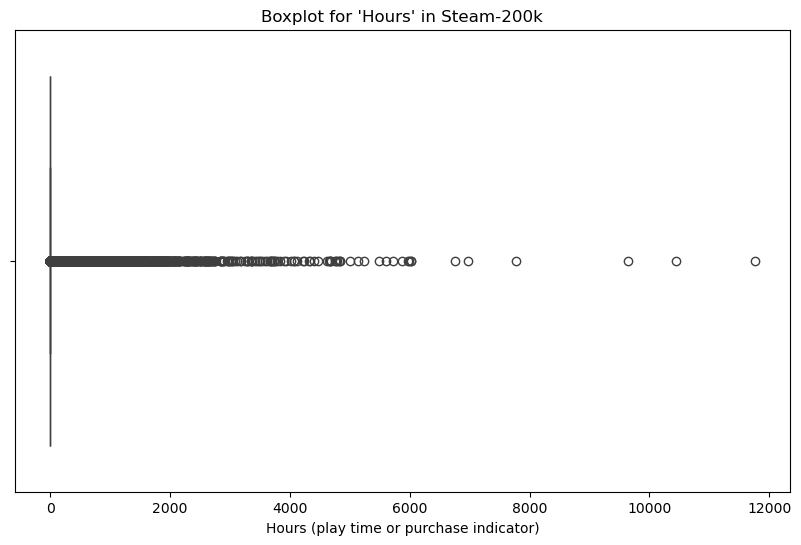

In [316]:
# Outlier detection via boxplots:
plt.figure(figsize=(10, 6))
sns.boxplot(x=steam_200k['hours'])
plt.title("Boxplot for 'Hours' in Steam-200k")
plt.xlabel("Hours (play time or purchase indicator)")
plt.show()


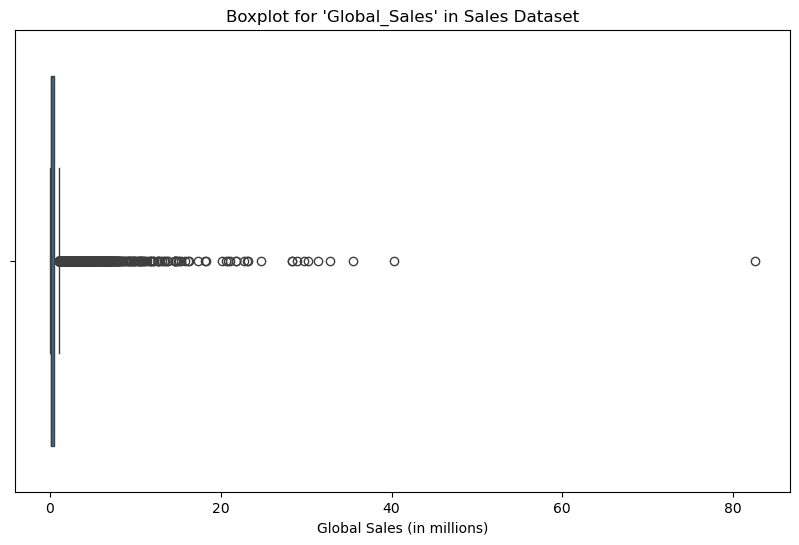

In [317]:

if 'Global_Sales' in sales.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sales['Global_Sales'])
    plt.title("Boxplot for 'Global_Sales' in Sales Dataset")
    plt.xlabel("Global Sales (in millions)")
    plt.show()

Global Sales Boxplot (Sales Dataset)

Most games have relatively low global sales, clustered near zero.
A handful of games achieve extremely high sales (in the tens of millions), appearing as outliers on the far right.
This pattern indicates a long-tail distribution, where a few titles dominate the total sales while most sell in smaller volumes.
Hours Boxplot (Steam-200k Dataset)

Many records show very low playtime (or 1 hour if it’s a purchase indicator), with a dense cluster near the left side.
A small number of games or users have extremely high playtime, reaching into the thousands of hours, and these appear as outliers.
Again, this reflects a highly skewed distribution: most users or play sessions are short, but a small subset of users invests an exceptionally large number of hours.
In both cases, the presence of numerous outliers highlights how a small proportion of data points can be much larger than the rest, pulling the “whiskers” of the boxplot far to the right. This is typical in datasets where there are a few extremely popular products (high sales) or highly engaged users (large hours of playtime), while the majority remain near more modest values.

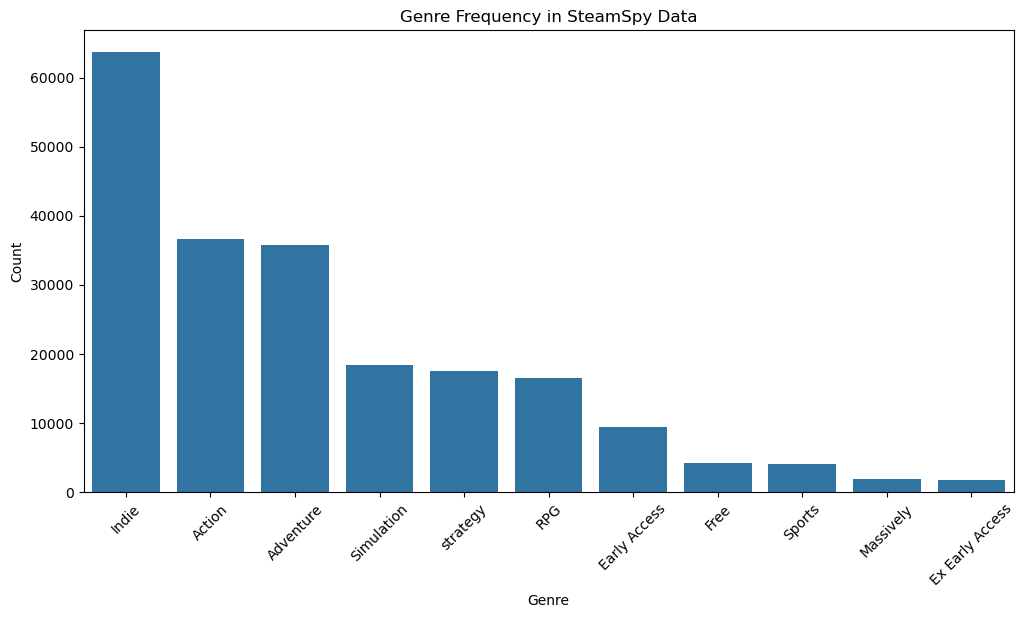

In [336]:

# --- 3. Preliminary EDA Findings ---

# 3.1 Genre Distribution from SteamSpy
plt.figure(figsize=(12, 6))
sns.countplot(data=steamspy, x='Genre', order=steamspy['Genre'].value_counts().index)
plt.title("Genre Frequency in SteamSpy Data")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [340]:
# "Name" to "Game", "hours" to "Hours"
steam_200k.rename(columns={
    "Name": "Game", 
    "hours": "Hours"
}, inplace=True)

# Standardize game names by stripping extra spaces and converting to lowercase
steam_200k["Game"] = steam_200k["Game"].str.strip().str.lower()

# Load Video_Games_Sales_as_at_22_Dec_2016.csv

# Rename "Name" to "Game" for merging
sales.rename(columns={"Name": "Game"}, inplace=True)
sales["Game"] = sales["Game"].str.strip().str.lower()


In [344]:
# 2. Merge the Datasets on Game Title
# -------------------------------
# Merge steam_200k and sales on the common "Game" column using an inner join
merged_df = pd.merge(steam_200k, sales, on="Game", how="inner")
print("\nMerged dataset shape:", merged_df.shape)
print("Merged dataset preview:")
print(merged_df.head())


Merged dataset shape: (93467, 20)
Merged dataset preview:
     user id       Game  purchase  Hours  0 Platform  Year_of_Release  \
0  151603712  fallout 4  purchase    1.0  0      PS4           2015.0   
1  151603712  fallout 4  purchase    1.0  0     XOne           2015.0   
2  151603712  fallout 4  purchase    1.0  0       PC           2015.0   
3  151603712  fallout 4      play   87.0  0      PS4           2015.0   
4  151603712  fallout 4      play   87.0  0     XOne           2015.0   

          Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0  Role-Playing  Bethesda Softworks      2.53      3.27      0.24   
1  Role-Playing  Bethesda Softworks      2.51      1.32      0.01   
2  Role-Playing  Bethesda Softworks      0.51      0.67      0.00   
3  Role-Playing  Bethesda Softworks      2.53      3.27      0.24   
4  Role-Playing  Bethesda Softworks      2.51      1.32      0.01   

   Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0         1.13 


Numeric columns in merged dataset: ['Hours', 'Global_Sales']

Correlation Matrix:
                  Hours  Global_Sales
Hours         1.000000      0.022968
Global_Sales  0.022968      1.000000


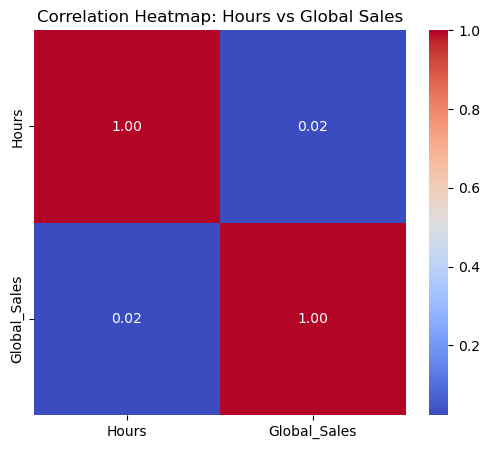

In [346]:
# 3. Correlation Analysis on the Merged Dataset
# -------------------------------

# Focus on key numeric columns:
# - From steam_200k: "Hours" (playtime or purchase behavior)
# - From sales: "Global_Sales" (sales figures)
numeric_cols = merged_df[["Hours", "Global_Sales"]].select_dtypes(include=[np.number]).columns
print("\nNumeric columns in merged dataset:", list(numeric_cols))

# Compute the correlation matrix
corr_matrix = merged_df[numeric_cols].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Hours vs Global Sales")
plt.show()

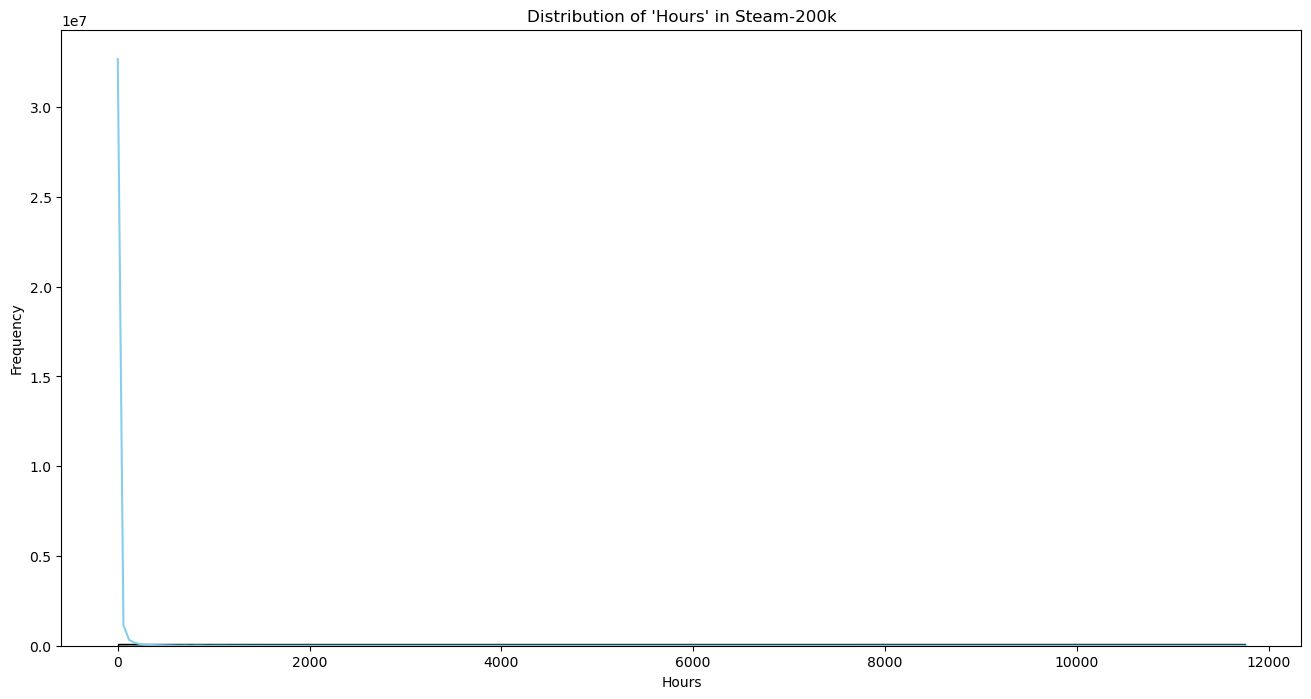

In [356]:
# 4.1 Histogram for Distribution of "Hours"
plt.figure(figsize=(16,8))
sns.histplot(merged_df["Hours"], bins=1, kde=True, color='skyblue')
plt.title("Distribution of 'Hours' in Steam-200k")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

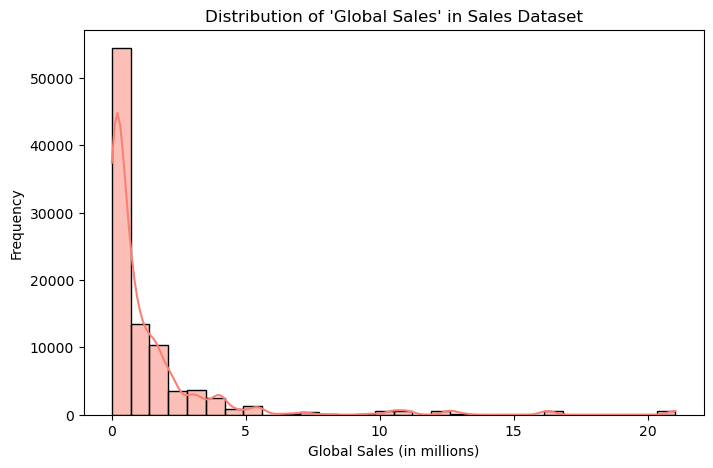

In [358]:
# 4.2 Histogram for Distribution of "Global_Sales"
plt.figure(figsize=(8,5))
sns.histplot(merged_df["Global_Sales"], bins=30, kde=True, color='salmon')
plt.title("Distribution of 'Global Sales' in Sales Dataset")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Frequency")
plt.show()

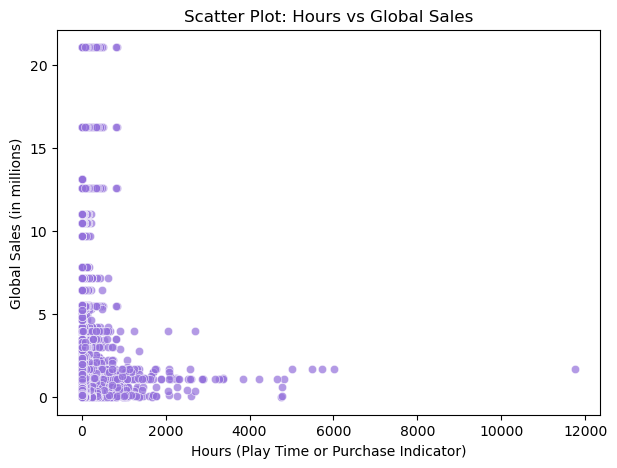

In [360]:
# 4.3 Scatter Plot: Hours vs Global Sales
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged_df, x="Hours", y="Global_Sales", color='mediumpurple', alpha=0.7)
plt.title("Scatter Plot: Hours vs Global Sales")
plt.xlabel("Hours (Play Time or Purchase Indicator)")
plt.ylabel("Global Sales (in millions)")
plt.show()

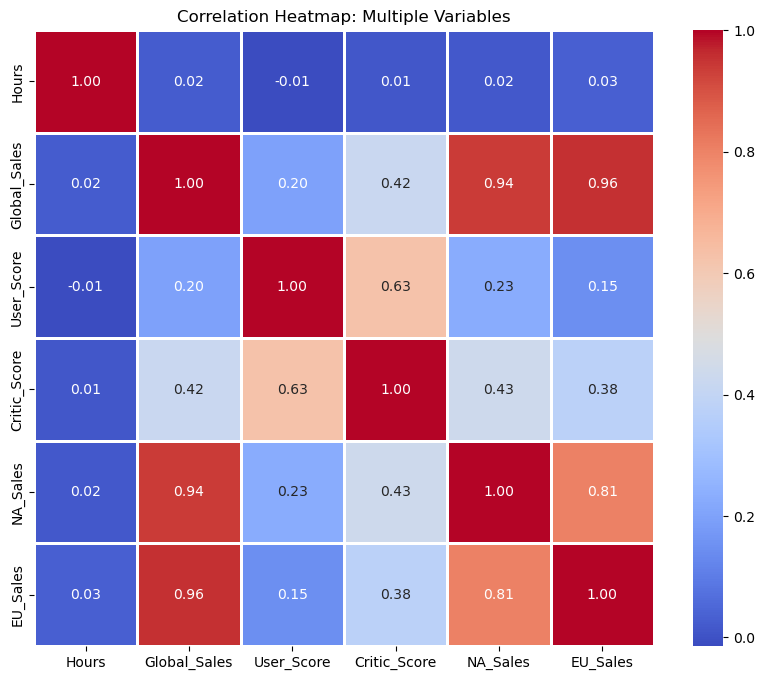

In [362]:
# Select multiple numeric columns to explore their correlations.
corr_cols = ['Hours', 'Global_Sales', 'User_Score', 'Critic_Score', 'NA_Sales', 'EU_Sales']

# Compute correlation matrix
corr_matrix = merged_df[corr_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap: Multiple Variables")
plt.show()

Top 20 Most Popular Games:
                                              Game  total_users  \
1332                                        dota 2         4841   
4254                               team fortress 2         2323   
4819                                      unturned         1563   
970                counter-strike global offensive         1412   
2075                        half-life 2 lost coast          981   
973                          counter-strike source          978   
2473                                 left 4 dead 2          951   
967                                 counter-strike          856   
4919                                      warframe          847   
2072                        half-life 2 deathmatch          823   
1886                                   garry's mod          731   
4366                    the elder scrolls v skyrim          717   
3552                                     robocraft          689   
968                  counter-strike

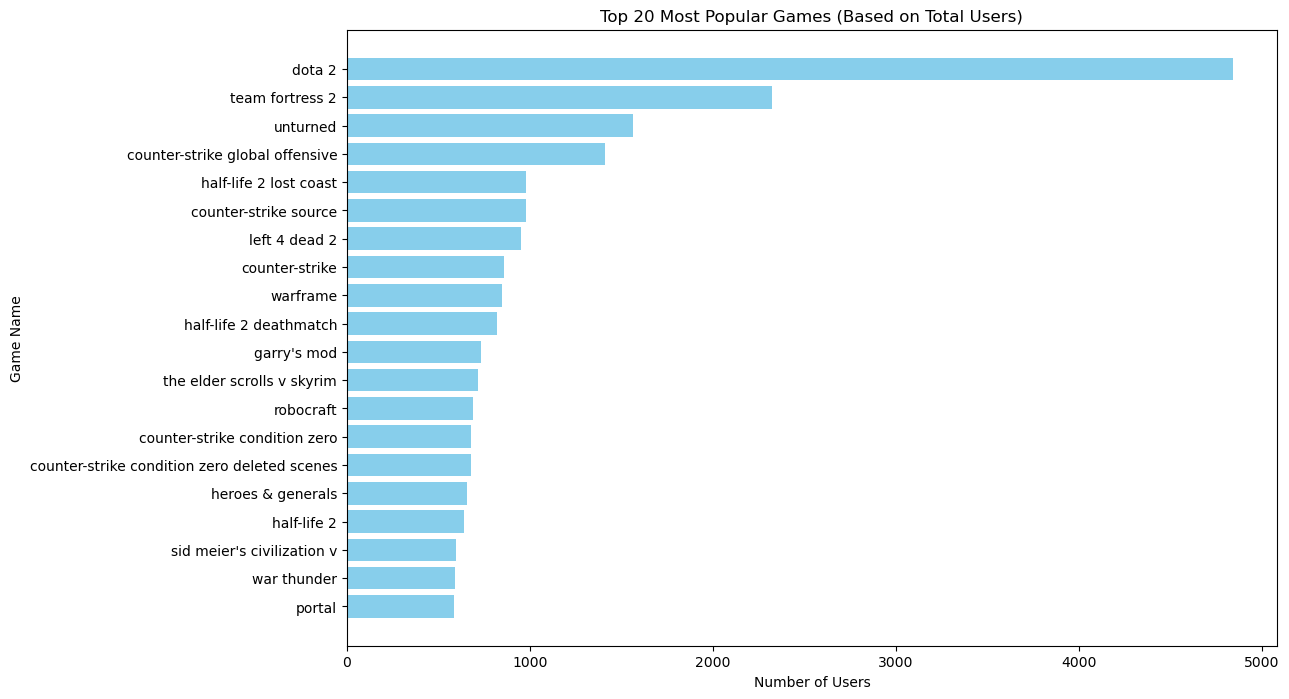

In [384]:

# Group by "Name" to calculate the total number of users and total playtime for each game
game_stats = steam_200k.groupby("Game").agg(
    total_users=("user id", "nunique"),  # Count unique users for each game
    total_playtime=("Hours", "sum")      # Sum the playtime for each game
).reset_index()

# Sort the data by total_users in descending order to get the top games
game_stats_sorted = game_stats.sort_values(by="total_users", ascending=False)

# Get the top 20 most popular games based on the number of users
top_20_games = game_stats_sorted.head(20)

# Display the top 20 games in a table format (showing the top rows)
print("Top 20 Most Popular Games:")
print(top_20_games)

# Plot the results for better visualization
plt.figure(figsize=(12, 8))

# Bar plot showing the top 20 games based on total users
plt.barh(top_20_games['Game'], top_20_games['total_users'], color='skyblue')
plt.xlabel('Number of Users')
plt.ylabel('Game Name')
plt.title('Top 20 Most Popular Games (Based on Total Users)')
plt.gca().invert_yaxis()  # To display the highest number of users at the top
plt.show()